<a href="https://colab.research.google.com/github/vdadithya2002/video_processing/blob/main/Video_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-3140148954.py:36: RuntimeWarning: overflow encountered in scalar subtract
  B2 = image[i, j] - Zmax


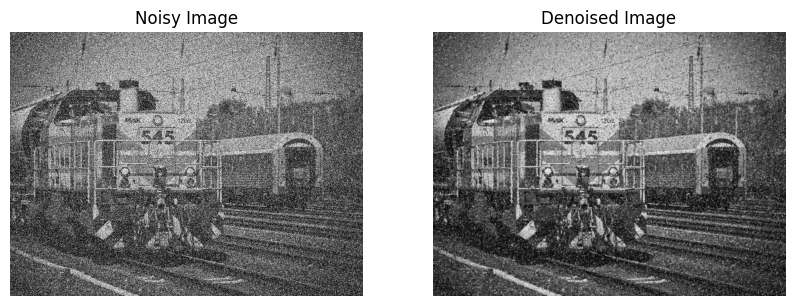

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def adaptive_median_filter(image, max_window_size=7):
    def get_median(window):
        return np.median(window)

    def get_min(window):
        return np.min(window)

    def get_max(window):
        return np.max(window)

    padded_image = np.pad(image, max_window_size // 2, mode='edge')
    filtered_image = np.copy(image)

    rows, cols = image.shape

    for i in range(rows):
        for j in range(cols):
            window_size = 3
            while window_size <= max_window_size:
                r_start = i + max_window_size//2 - window_size//2
                c_start = j + max_window_size//2 - window_size//2
                window = padded_image[r_start:r_start+window_size, c_start:c_start+window_size]

                Zmin = get_min(window)
                Zmax = get_max(window)
                Zmed = get_median(window)
                A1 = Zmed - Zmin
                A2 = Zmed - Zmax

                if A1 > 0 and A2 < 0:
                    B1 = image[i, j] - Zmin
                    B2 = image[i, j] - Zmax
                    if B1 > 0 and B2 < 0:
                        pixel = image[i, j]
                    else:
                        pixel = Zmed
                    break
                else:
                    window_size += 2  # Increase window size
            else:
                pixel = Zmed

            filtered_image[i, j] = pixel

    return filtered_image

# Load noisy image (grayscale)
img = cv2.imread("train_noise.jpg", cv2.IMREAD_GRAYSCALE)

# Apply adaptive median filter
denoised_img = adaptive_median_filter(img)

# Show results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Noisy Image")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Denoised Image")
plt.imshow(denoised_img, cmap='gray')
plt.axis('off')
plt.show()
